
# Business Decisions: Hypotheses Prioritization & A/B Testing


<b> Plan: 
    
Part 1. Hypotheses Prioritization </b>

1.1. Load the data and prepare it for analysis  

1.2. Apply the ICE framework for hypotheses prioritization  

1.3. Apply the RICE framework for hypotheses prioritization  

1.4. Compare the results and summarize the findings  


<b> Part 2. A/B Test Analysis </b>

2.1. Load the data and prepare it for analysis  

2.2. Check the data for duplicates and ensure correct data types  

2.3. Create a dataframe with cumulative values and plot these metrics  

2.4. Build scatter plots to identify outliers  

2.5. Test hypotheses based on A/B test results  

2.6. Conclusions and recommendations 

<b> Part 1. Hypotheses Prioritization.

1.1. Data loading and preparation for analysis.</b>

Data description:

        • Hypothesis — a short description of the hypothesis;
        • Reach — the user reach on a 10-point scale;
        • Impact — the impact on users on a 10-point scale;
        • Confidence — the confidence in the hypothesis on a 10-point scale;
        • Efforts — the resource cost to test the hypothesis on a 10-point scale. The larger the Efforts value, the more expensive it is to test the hypothesis.


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt


In [2]:
# load the data into a variable
url = "https://raw.githubusercontent.com/annaworobyeva-stack/Hypotheses-Prioritization-A-B-Testing/refs/heads/main/hypothesis_eng.csv"
hypothesis = pd.read_csv(url)

In [3]:
# inspect the dataset

display('Hypothesis', hypothesis)
display(hypothesis.info())

'Гипотезы'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Add two new traffic channels, which will attra...",3,10,8,6
1,"Launch your own delivery service, which will s...",2,5,4,10
2,Add product recommendation blocks to the onlin...,8,3,7,3
3,"Change the category structure, which will incr...",8,3,3,8
4,Change the background color of the main page t...,3,1,1,1
5,"Add a customer reviews page about the store, w...",3,2,2,3
6,Show banners with current promotions and sales...,5,3,8,3
7,Add a subscription form to all the main pages ...,10,7,8,5
8,Launch a promotion offering a discount on a pr...,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

We have a dataset with 9 hypotheses and their evaluations for the Reach, Impact, Confidence and Efforts metrics. There are no missing values; the data types are correct.


<b>1.2. Applying the ICE framework for hypotheses prioritization<b/>


In [4]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'])
print(hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False).to_string(index=False))

                                                                                                                Hypothesis  ICE
                                                      Launch a promotion offering a discount on a product on your birthday 16.0
                                                          Add two new traffic channels, which will attract 30% more users. 13.0
                           Add a subscription form to all the main pages to collect a customer base for email newsletters. 11.0
                                    Show banners with current promotions and sales on the main page to increase conversion  8.0
Add product recommendation blocks to the online store's website to increase the conversion rate and average order receipt.  7.0
                                          Launch your own delivery service, which will shorten the delivery time of orders  2.0
      Change the category structure, which will increase the conversion rate, as users will find the rig

When prioritizing hypotheses using the ICE method, the top three hypotheses were:
1. Launch a promotion offering a discount on goods on the customer's birthday – 16 points
2. Add two new traffic channels to attract 30% more users – 13 points
3. Add a subscription form on all main pages to build a client base for email newsletters – 11 points


<b>1.3. Applying the RICE framework for hypotheses prioritization<b/>


In [5]:
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'])
print(hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False).to_string(index=False))

                                                                                                                Hypothesis  RICE
                           Add a subscription form to all the main pages to collect a customer base for email newsletters. 112.0
Add product recommendation blocks to the online store's website to increase the conversion rate and average order receipt.  56.0
                                                          Add two new traffic channels, which will attract 30% more users.  40.0
                                    Show banners with current promotions and sales on the main page to increase conversion  40.0
                                                      Launch a promotion offering a discount on a product on your birthday  16.0
      Change the category structure, which will increase the conversion rate, as users will find the right product faster.   9.0
                                          Launch your own delivery service, which will shorten th

When prioritizing hypotheses using the RICE method, the top three hypotheses were:

1. Add a subscription form on all main pages to build a customer base for email newsletters – 112 points
2. Add product recommendation blocks to the online store site to increase conversion and average order value – 56 points
3. Add two new traffic channels to attract 30% more users – 40 points


<b>1.4. Comparison of the results, conclusion. </b>


Different methods of prioritizing hypotheses gave different results. The RICE framework includes the Reach metric — the audience reach affected by the change. In the context of our case, where the goal is to increase the revenue of the online store, reach is a critically important factor because it directly affects the scale of the potential effect.

Therefore, I believe that the RICE method allows for a more well-founded choice of hypotheses for implementation.


<b> Part 2. A/B Test Analysis.</b>

<b> 2.1. Load the data and prepare it for analysis</b>

Data description:

File /datasets/orders.csv

        • transactionId — order ID;
        • visitorId — ID of the user who placed the order;
        • date — date when the order was placed;
        • revenue — order revenue;
        • group — the A/B test group to which the order belongs.
        
File /datasets/visitors.csv

        • date — date;
        • group — A/B test group;
        • visitors — number of users on the specified date in the specified A/B test group


In [6]:
# load the data into variables

url = "https://raw.githubusercontent.com/annaworobyeva-stack/Hypotheses-Prioritization-A-B-Testing/refs/heads/main/orders.csv"
orders = pd.read_csv(url)

url = "https://raw.githubusercontent.com/annaworobyeva-stack/Hypotheses-Prioritization-A-B-Testing/refs/heads/main/visitors.csv"
visitors = pd.read_csv(url) 

In [7]:
# inspect the datasets

display('Orders', orders.head())
display(orders.info())

display('Visitors', visitors.head())
display(visitors.info())

'Заказы'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Посетители'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

<b>2.2. Check the data for duplicates and ensure correct data types </b>


In [8]:
# change the data type of the date columns

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [9]:
# check the data for duplicates

display(orders.loc[orders.duplicated() == True])
display(visitors.loc[visitors.duplicated() == True])

,transactionId,visitorId,date,revenue,group


,date,group,visitors


In this step we changed the data type in the date columns and checked for duplicates. No duplicates were found


In [10]:
# check the correctness of splitting users into groups
# select all unique users from groups A and B and assign the list to a variable

users_A = orders.query('group == "A"')['visitorId'].unique()

users_B = orders.query('group == "B"')['visitorId'].unique()

duplicate_users = np.intersect1d(users_A, users_B)
duplicate_users


array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [11]:
# remove these users from the dataframe

display(orders.info())
orders = orders[~orders['visitorId'].isin(duplicate_users)]
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


None

<b>2.3. Create a dataframe with cumulative values and build plots of these values </b>


In [12]:
# create a dataframe with cumulative values

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In the course of the work we created a combined dataframe with cumulative data: number of orders, number of buyers, revenue and number of visitors aggregated by date and test group


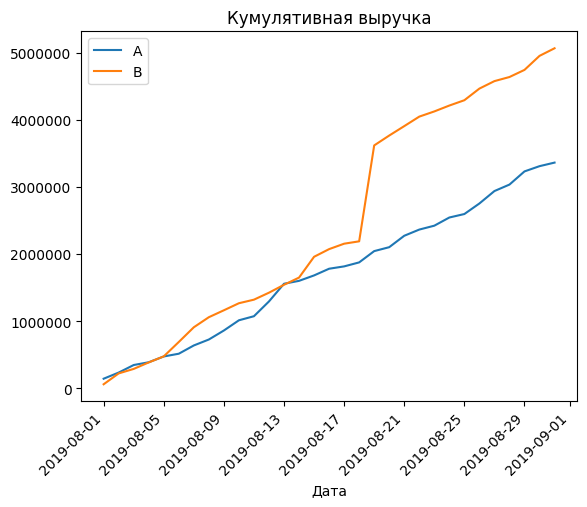

In [13]:
# plot the cumulative revenue by group

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.title('The cumulative revenue by group')
plt.legend()
plt.show()

For the first five days, cumulative revenues in both groups grow equally. Afterwards, group B starts to show better results. But around the 17th–18th we see a sharp spike in the revenue of group B, which gives us reason to consider it an outlier


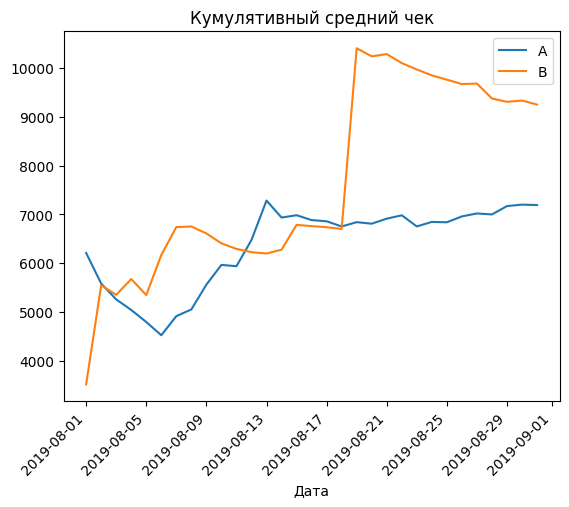

In [14]:
# plot the cumulative average order value by group

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.title('The cumulative average order value by group')
plt.legend()
plt.show()

A similar situation is observed with the cumulative average order value. Group B shows better results, but on the 17th–18th there is a spike in the values. After this spike, the indicator for group B slowly decreases, thus leveling out to its average value.


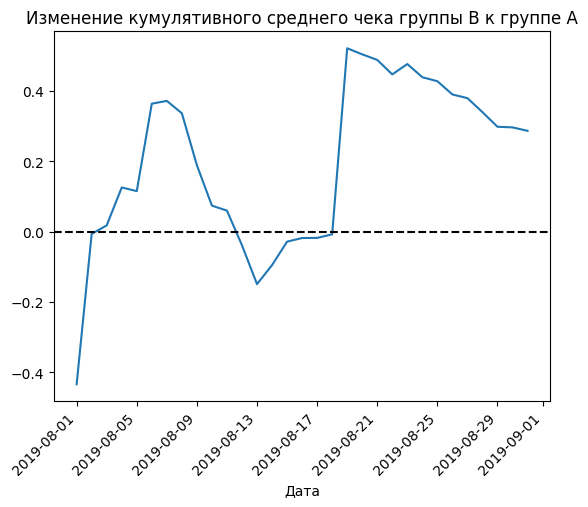

In [15]:
# plot the relative change of the cumulative average order value of group B compared to group A

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) / 
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.title('The relative change of the cumulative average order value of group B compared to group A')
plt.show()

Sudden spikes in the graph may indicate outliers in the values


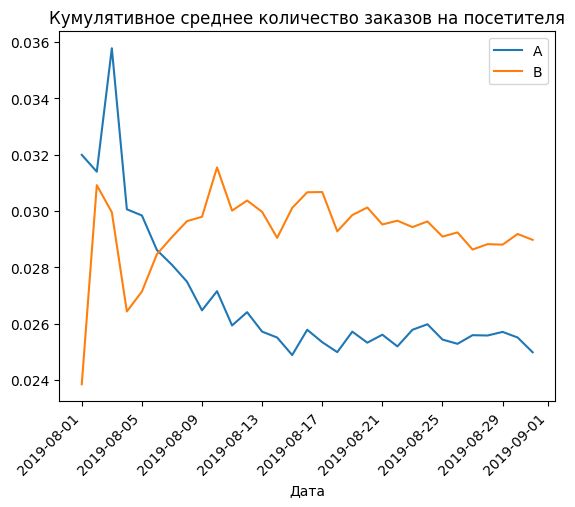

In [16]:
# plot the cumulative average number of orders per visitor by group

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.title('The cumulative average number of orders per visitor by group')
plt.legend()
plt.show()


At the beginning of the measurements the indicators fluctuate, which is natural, since in the first days each value has a large influence on the cumulative average. After that, group B shows a better result, but judging by the spikes, there were outliers.


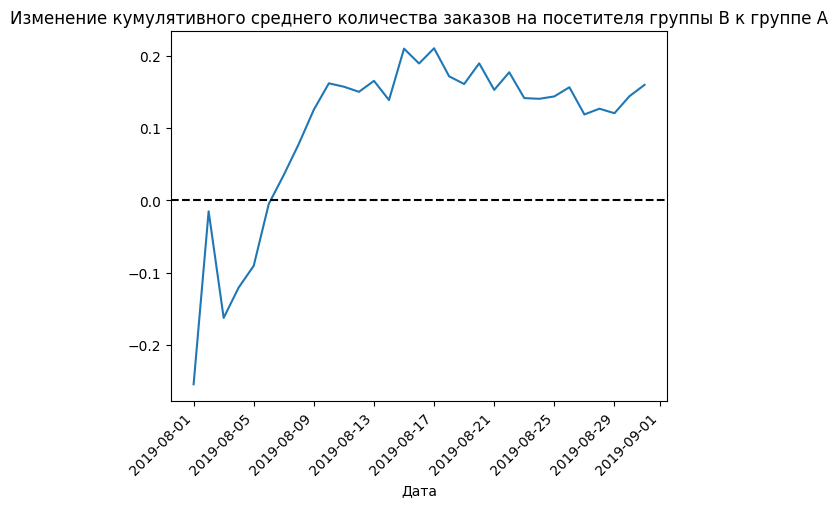

In [17]:
# plot the relative change of the cumulative average number of orders per visitor in group B compared to group A

mergedCumulativeConversions =(
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.title('The change of the cumulative average number of orders per visitor in group B compared to group A')
plt.show()

The ratio of the cumulative average number of orders also shows spikes. We need to check the data for anomalies.


<b>2.4. Build scatter plots to identify outliers</b>


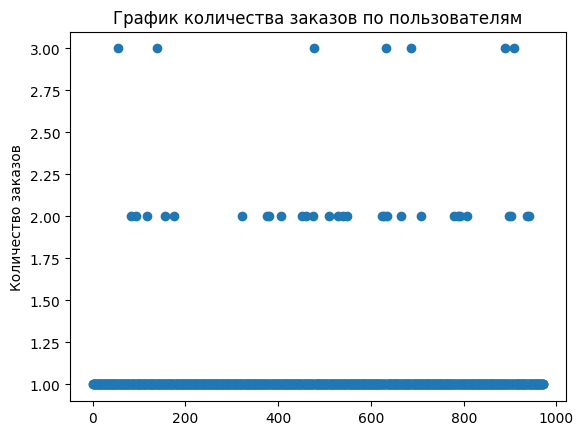

In [18]:
# build a scatter plot of the number of orders per user

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Number of orders')
plt.title('The scatter plot of the number of orders per user')
plt.show()

Indeed, on the graph of the number of orders per user we see anomalous values. Let's look at percentiles to determine where the anomaly threshold lies.


In [19]:
# calculate the 95th and 99th percentiles of the number of orders per user and choose a threshold to identify anomalous users

print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Users with more than 3 orders can be considered outliers.


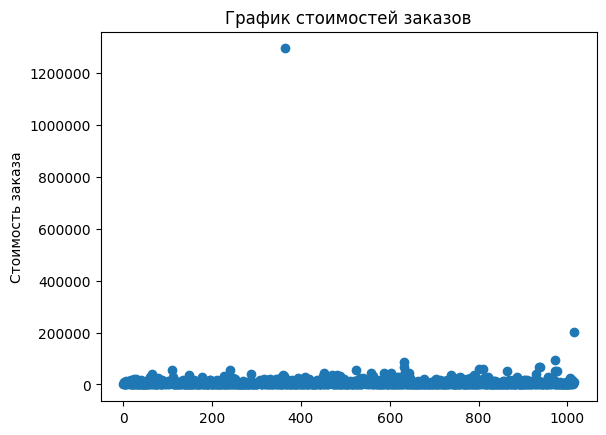

In [20]:
# build a scatter plot of order values

x_values = pd.Series(range(0,len(orders['revenue'])))
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Values')
plt.title('The scatter plot of order values')
plt.show()

On the graph of order values we also see extreme values. Let's look at the percentile boundaries.


In [21]:
# calculate the 95th and 99th percentiles of the cost of orders. Choose a border to identify abnormal orders.


print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


<b>2.5. Hypothesis testing based on the results of the A/B test</b>


In [22]:
# create a dataframe combining visitor and order data, split by groups A and B

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Hypotheses:

H0: The mean number of orders per visitor in groups A and B are equal; there are no statistically significant differences.

H1: The mean number of orders per visitor in groups A and B are different; there are statistically significant differences.


In [23]:
# calculate the statistical significance of differences in the average number of orders per visitor between the groups based on the raw data

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Relative difference:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительные различия: 0.160


The p-value is slightly above 1%, which means that the null hypothesis is not confirmed and there are statistically significant differences between the groups in the A/B test. The number of orders in group B is 13% higher, but these results are based on raw metrics.


Hypotheses:
    
H0: The average order values of visitors in groups A and B are equal; there are no statistically significant differences.

H1: The average order values of visitors in groups A and B are different; there are statistically significant differences.


In [24]:
# calculate the statistical significance of differences in the average order value between the groups based on the raw data

print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Relative difference:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительные различия: 0.287


According to the 'raw' data, there is no difference in the average order values in groups A and B; we do not reject the null hypothesis. The relative difference is not statistically significant.


In [29]:
# find rows with anomalous values

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
display(abnormalUsers.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64


49

49 users with abnormal values will be removed from the test results.


In [26]:
# filter these values out of the data

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [27]:
# calculate the statistical significance of differences in the average number of orders per visitor between the groups based on the cleaned data

print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative difference:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.010
Относительные различия: 0.187


The statistical significance of differences in the average number of orders per visitor between the groups based on the cleaned data does not differ much from the original result. We reject the null hypothesis; the result of group B is 15% better.


Hypotheses:

H0: The average order values of visitors in groups A and B are equal; there are no statistically significant differences.

H1: The average order values of visitors in groups A and B are different; there are statistically significant differences.


In [28]:
# calculate the statistical significance of differences in the average order value between the groups based on the cleaned data

print('P-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Relative difference:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.741
Относительные различия: -0.027


The p-value is much higher than 0.05, so we do not reject the null hypothesis of equal average order values for the two groups. The relative difference is not significant.


<b>CONCLUSION</b>

Based on the results of the A/B test, the following conclusions can be drawn:

The average order value in groups A and B does not differ statistically significantly — the hypothesis about a difference in the average value was not confirmed.

The number of orders in the second group turned out to be 15% higher than in the first. This indicates that the implemented change encourages an increase in the number of purchases, but does not affect their average size.

The total revenue of group B exceeds the revenue of group A, which indicates the success of the innovation.

Thus, the test showed that the changes lead to an increase in the number of orders without reducing the average check. It is recommended to stop the experiment and proceed to roll out the updated functionality on a larger scale.
